In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
import import_ipynb
#import Scaling_methods as scaling

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

matplotlib.rc('axes', titlesize=14)
matplotlib.rc('xtick', labelsize=14)     
matplotlib.rc('ytick', labelsize=20)

import matplotlib.pylab as pylab
params = {'legend.fontsize': 12,
         'axes.labelsize': 16,
         'axes.titlesize':16,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
pylab.rcParams.update(params)

In [4]:
#features used
index = ['u (m/s)', 'T (K)', 'H2', 'H', 'O', 'O2', 'OH',
       'H2O', 'HO2', 'H2O2', 'C', 'CH', 'CH2', 'CH2(S)', 'CH3', 'CH4', 'CO',
       'CO2', 'HCO', 'CH2O', 'CH2OH', 'CH3O', 'CH3OH', 'C2H', 'C2H2', 'C2H3',
       'C2H4', 'C2H5', 'C2H6', 'HCCO', 'CH2CO', 'HCCOH', 'N', 'NH', 'NH2',
       'NH3', 'NNH', 'NO', 'NO2', 'N2O', 'HNO', 'CN', 'HCN', 'H2CN', 'HCNN',
       'HCNO', 'HOCN', 'HNCO', 'NCO', 'N2', 'AR', 'C3H7', 'C3H8', 'CH2CHO',
       'CH3CHO']
# target
target_name = ['Tin']

In [5]:
Y_pf = pd.read_csv("Y_pf.csv", sep=',', names = index) #shape: (26000, 55)

In [6]:
X_pf = pd.read_csv("X.csv", sep=',', names = ['unknown_1', 'unknown_2', 'Tin']) #shape: (25999, 3) 
X_pf.head()


,unknown_1,unknown_2,Tin
0,0.011614,0.085258,500
1,0.017166,0.085258,900
2,0.018035,0.033771,500
3,0.013240,0.028302,300
4,0.014744,0.060219,900


In [7]:
# Features
#df = new_labels  #shape:
df = Y_pf         #shape:

# target
#target = labels['Tin']  #shape:
target = X_pf['Tin']     #shape:

In [8]:
df_with_target = pd.concat([Y_pf, target],axis=1)

In [9]:
Y_pf_sampled = df_with_target.loc[df_with_target['Tin'] == 300]
Y_pf_sampled.head()
X_sampled = Y_pf_sampled.drop(['Tin'], axis =1)

Text(0,0.5,'H2O')

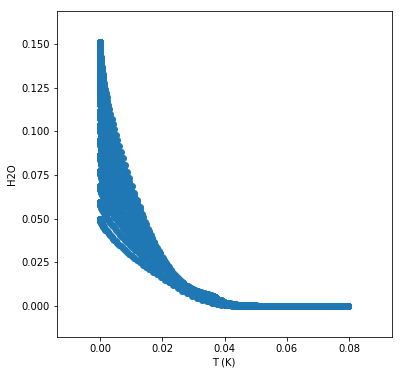

In [10]:
plt.figure(figsize=(6,6));
y = X_sampled['CH4']
x = X_sampled['CO2']
plt.scatter(x, y);
plt.xlabel('T (K)')
plt.ylabel("H2O")

Text(0,0.5,'H2O')

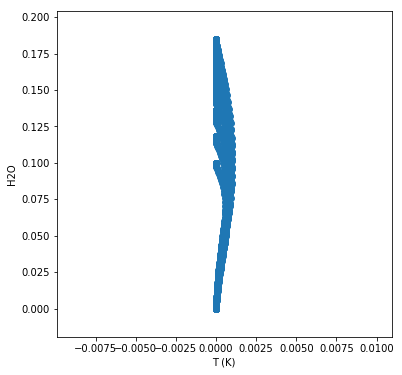

In [11]:



plt.figure(figsize=(6,6));
y = X_sampled['H2O']
x = X_sampled['CH2O']
plt.scatter(x, y);
plt.xlabel('T (K)')
plt.ylabel("H2O")

In [12]:
class RangeScaler():
    def __init__(self):
        return None

    def transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)
        Z = X/(np.max(X, axis=0)-np.min(X, axis=0))
        return Z
    
    def fit_transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)
        X_mean = X.mean(axis=0)
        X_center = X-X_mean
        Z = X_center/(np.max(X, axis=0)-np.min(X, axis=0))
        return Z

In [70]:
f1 = 'H2O'
f2 = 'CH2O'
X = pd.concat([X_sampled[f1],X_sampled[f2]], axis =1)
range_scaler = RangeScaler()
X_range_scaled = range_scaler.fit_transform(X)

In [71]:
X_range_scaled.shape

(6500, 2)

Text(0.5,0,'T (K)')

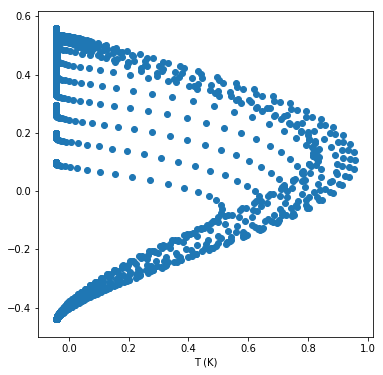

In [72]:
plt.figure(figsize=(6,6));
y = X_range_scaled[:,0]
x = X_range_scaled[:,1]
plt.scatter(x, y);
plt.xlabel('T (K)')

In [73]:
def write_in_file(file_name, data):
    """store data in the given file in
        binary mode with overwritng option

        Input:
                file_name : the name of the file
                data : list or numpy array"""

    with open(file_name, 'wb') as fp:
        pickle.dump(data, fp)


def read_from_file(file_name):
    """Read data from the given file in
        binary mode

        Input:
                file_name : the name of the file
        Ouput :
                data : list or numpy array"""

    with open(file_name, 'rb') as fp:
        data = pickle.load(fp)
    return data   

In [74]:
path = r'C:\Users\azarguit\Desktop\master\memoire\case_study\src_matlab' + '\\'
input_file_name = path + 'input_data_set.txt'
write_in_file(input_file_name, X_range_scaled)

In [80]:
"""
Script for calling matlab functions and store the results into files

Input  : file of numpy arrays:
                               input_file_name = 'input_data_set.txt'
                               
Output : files of numpy arrays
"""


import matlab.engine
import numpy as np
import pickle
import matlab



def write_in_file(file_name, data):
    """store data in the given file in
        binary mode with overwritng option

        Input:
                file_name : the name of the file
                data : list or numpy array"""

    with open(file_name, 'wb') as fp:
        pickle.dump(data, fp)


def read_from_file(file_name):
    """Read data from the given file in
        binary mode

        Input:
                file_name : the name of the file
        Ouput :
                data : list or numpy array"""

    with open(file_name, 'rb') as fp:
        data = pickle.load(fp)
    return data




n_eigs = 20
k = 2

path = r'C:\Users\azarguit\Desktop\master\memoire\case_study\src_matlab' + '\\'
input_file_name = path + 'input_data_set.txt'


data = read_from_file(input_file_name)
print(data.shape)
print(type(data))

print('data input size of python array')
data_list = data.tolist()
print(len(data_list))

X = matlab.double(data_list)

print('data input size of mlarray')
print(X.size)


eng = matlab.engine.start_matlab()
idx = eng.localPCA(X, n_eigs, k)

clusters = eng.get_clusters(X, idx)

print('clusters')


eigvec, n_eig, gamma, u_scores, eigenvalues, centroids = eng.lpca(clusters, n_eigs, nargout=6)

print('writing in files')

idx_file_name = 'idx.txt'
clusters_file_name = 'clusters.txt'
eigvec_file_name = 'eigvec.txt'
n_eig_file_name = 'n_eig.txt'
gamma_file_name = 'gamma.txt'
u_scores_file_name = 'u_scores.txt'
eigenvalues_file_name = 'eigenvalues.txt'
centroids_file_name = 'centroids.txt'


clusters = np.asarray(clusters)[0]
eigvec = np.asarray(eigvec)[0]
n_eig = np.asarray(n_eig)[0]
gamma = np.asarray(gamma)[0]
u_scores = np.asarray(u_scores)[0]
eigenvalues = np.asarray(eigenvalues)[0]
centroids = np.asarray(centroids)[0]


np.save(idx_file_name, idx)
np.save(clusters_file_name, clusters)


(6500, 2)
<class 'numpy.ndarray'>
data input size of python array
6500
data input size of mlarray
(6500, 2)
clusters
writing in files


In [81]:
path = r'C:\Users\azarguit\Desktop\master\memoire\case_study\src_matlab' + '\\'
idx_file_name = 'idx.txt.npy'
clusters_file_name = 'clusters.txt.npy'

idx = np.load(idx_file_name)
clusters = np.load(clusters_file_name)


In [82]:
columns_new = ['idx']
# pass in array and columns
df_idx = pd.DataFrame(idx, columns=columns_new)
df_idx =  df_idx['idx']  
df_idx.tail(1000)


5500    2.0
5501    2.0
5502    2.0
5503    2.0
5504    1.0
5505    2.0
5506    2.0
5507    1.0
5508    2.0
5509    2.0
5510    2.0
5511    2.0
5512    1.0
5513    2.0
5514    2.0
5515    2.0
5516    2.0
5517    1.0
5518    2.0
5519    2.0
5520    1.0
5521    1.0
5522    1.0
5523    2.0
5524    2.0
5525    2.0
5526    1.0
5527    1.0
5528    2.0
5529    2.0
       ... 
6470    1.0
6471    2.0
6472    1.0
6473    2.0
6474    1.0
6475    2.0
6476    2.0
6477    2.0
6478    1.0
6479    2.0
6480    2.0
6481    2.0
6482    2.0
6483    2.0
6484    2.0
6485    2.0
6486    2.0
6487    1.0
6488    2.0
6489    2.0
6490    1.0
6491    2.0
6492    2.0
6493    2.0
6494    2.0
6495    1.0
6496    1.0
6497    1.0
6498    2.0
6499    2.0
Name: idx, Length: 1000, dtype: float64

In [83]:
X_range_scaled = pd.DataFrame(X_range_scaled, columns=[f1, f2])
clustered_labels = pd.concat([X_range_scaled, df_idx], axis=1)
clustered_labels.head()
#df_with_target = pd.concat([eda.df, eda.target], axis=1)
#clustered_labels = clustered_labels[clustered_labels.idx != 2]
#clustered_labels = clustered_labels[clustered_labels.idx != 3]
#clustered_labels = clustered_labels[clustered_labels.idx != 6]
#clustered_labels = clustered_labels[clustered_labels.idx != 7]
#clustered_labels = clustered_labels[clustered_labels.idx != 8]
#df_idx = clustered_labels['idx']
#df1 = df[['a','b']]
#clustered_labels.drop('idx', axis=1).shape

,H2O,CH2O,idx
0,-0.292616,0.126387,2.0
1,0.459799,-0.041601,2.0
2,-0.440266,-0.041601,1.0
3,-0.440168,-0.041589,1.0
4,-0.440266,-0.041601,1.0


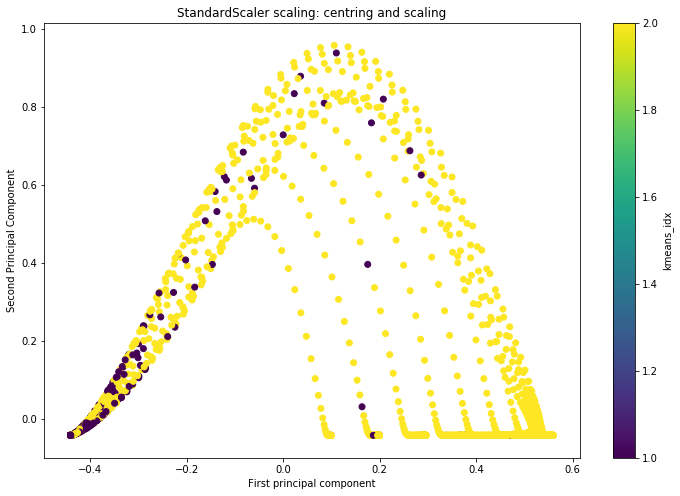

In [84]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(12, 8))

surf1 = ax1.scatter(clustered_labels[f1], clustered_labels[f2],c=clustered_labels['idx'])
ax1.set_xlabel('First principal component')
ax1.set_ylabel('Second Principal Component')
ax1.set_title('StandardScaler scaling: centring and scaling')
fig.colorbar(surf1,label='kmeans_idx')